In [ ]:
pip install kagglehub

In [ ]:
pip install category_encoders

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler,FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.base import BaseEstimator, TransformerMixin

In [ ]:
import kagglehub
path = kagglehub.dataset_download("debajyotipodder/co2-emission-by-vehicles")


print(os.listdir(path))


['CO2 Emissions_Canada.csv', 'Data Description.csv']


In [ ]:
df = pd.read_csv(os.path.join(path, "CO2 Emissions_Canada.csv"))
print(df.head())

    Make       Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0  ACURA         ILX       COMPACT             2.0          4          AS5   
1  ACURA         ILX       COMPACT             2.4          4           M6   
2  ACURA  ILX HYBRID       COMPACT             1.5          4          AV7   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6          AS6   
4  ACURA     RDX AWD   SUV - SMALL             3.5          6          AS6   

  Fuel Type  Fuel Consumption City (L/100 km)  \
0         Z                               9.9   
1         Z                              11.2   
2         Z                               6.0   
3         Z                              12.7   
4         Z                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                              6.7                               8.5   
1                              7.7                               9.6   
2                   

In [ ]:
print(df['Vehicle Class'].unique())

['COMPACT' 'SUV - SMALL' 'MID-SIZE' 'TWO-SEATER' 'MINICOMPACT'
 'SUBCOMPACT' 'FULL-SIZE' 'STATION WAGON - SMALL' 'SUV - STANDARD'
 'VAN - CARGO' 'VAN - PASSENGER' 'PICKUP TRUCK - STANDARD' 'MINIVAN'
 'SPECIAL PURPOSE VEHICLE' 'STATION WAGON - MID-SIZE'
 'PICKUP TRUCK - SMALL']


In [ ]:
print(df['Transmission'].unique())

['AS5' 'M6' 'AV7' 'AS6' 'AM6' 'A6' 'AM7' 'AV8' 'AS8' 'A7' 'A8' 'M7' 'A4'
 'M5' 'AV' 'A5' 'AS7' 'A9' 'AS9' 'AV6' 'AS4' 'AM5' 'AM8' 'AM9' 'AS10'
 'A10' 'AV10']


In [ ]:
print(df['Fuel Type'].unique())

['Z' 'D' 'X' 'E' 'N']


In [ ]:
df.shape

(7385, 12)

In [ ]:
df.describe(include='object')

,Make,Model,Vehicle Class,Transmission,Fuel Type
count,7385,7385,7385,7385,7385
unique,42,2053,16,27,5
top,FORD,F-150 FFV,SUV - SMALL,AS6,X
freq,628,32,1217,1324,3637


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [ ]:
print(f"Missing Percentage in Each Column:")

for col in df.columns:
    print(col,f"{df[col].isnull().sum()/len(df):.2%}")

Missing Percentage in Each Column:
Make 0.00%
Model 0.00%
Vehicle Class 0.00%
Engine Size(L) 0.00%
Cylinders 0.00%
Transmission 0.00%
Fuel Type 0.00%
Fuel Consumption City (L/100 km) 0.00%
Fuel Consumption Hwy (L/100 km) 0.00%
Fuel Consumption Comb (L/100 km) 0.00%
Fuel Consumption Comb (mpg) 0.00%
CO2 Emissions(g/km) 0.00%


In [ ]:
for col in df.columns:
    print(col,df.columns.duplicated().sum())

Make 0
Model 0
Vehicle Class 0
Engine Size(L) 0
Cylinders 0
Transmission 0
Fuel Type 0
Fuel Consumption City (L/100 km) 0
Fuel Consumption Hwy (L/100 km) 0
Fuel Consumption Comb (L/100 km) 0
Fuel Consumption Comb (mpg) 0
CO2 Emissions(g/km) 0


In [ ]:
print("Negative values per column:")
print((df.select_dtypes(include=[int, float]) < 0).sum())

print("\nZero values per column:")
print((df.select_dtypes(include=[int, float]) == 0).sum())

Negative values per column:
Engine Size(L)                      0
Cylinders                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

Zero values per column:
Engine Size(L)                      0
Cylinders                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64


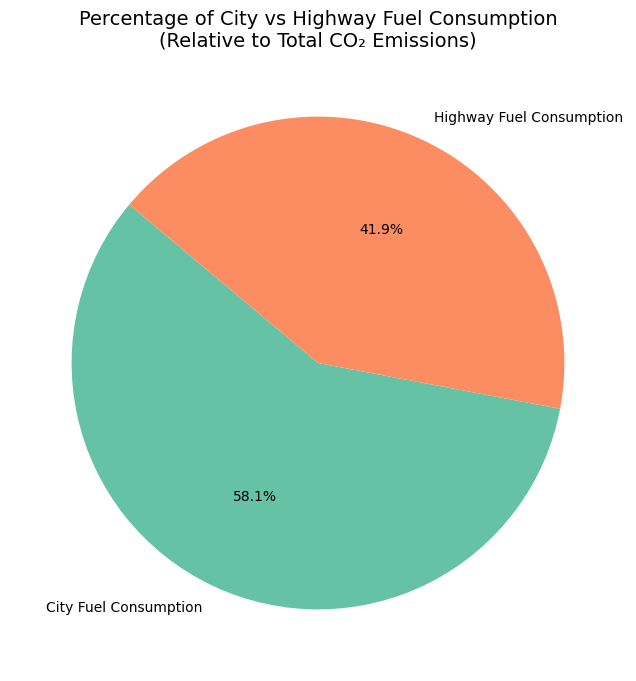

In [ ]:
total_city_fuel = df['Fuel Consumption City (L/100 km)'].sum()
total_highway_fuel = df['Fuel Consumption Hwy (L/100 km)'].sum()

total_fuel = total_city_fuel + total_highway_fuel
city_percentage = (total_city_fuel / total_fuel) * 100
highway_percentage = (total_highway_fuel / total_fuel) * 100

labels = ['City Fuel Consumption', 'Highway Fuel Consumption']
sizes = [city_percentage, highway_percentage]

colors = sns.color_palette('Set2')

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%.1f%%', startangle=140)
plt.title('Percentage of City vs Highway Fuel Consumption\n(Relative to Total CO₂ Emissions)', fontsize=14)
plt.show()

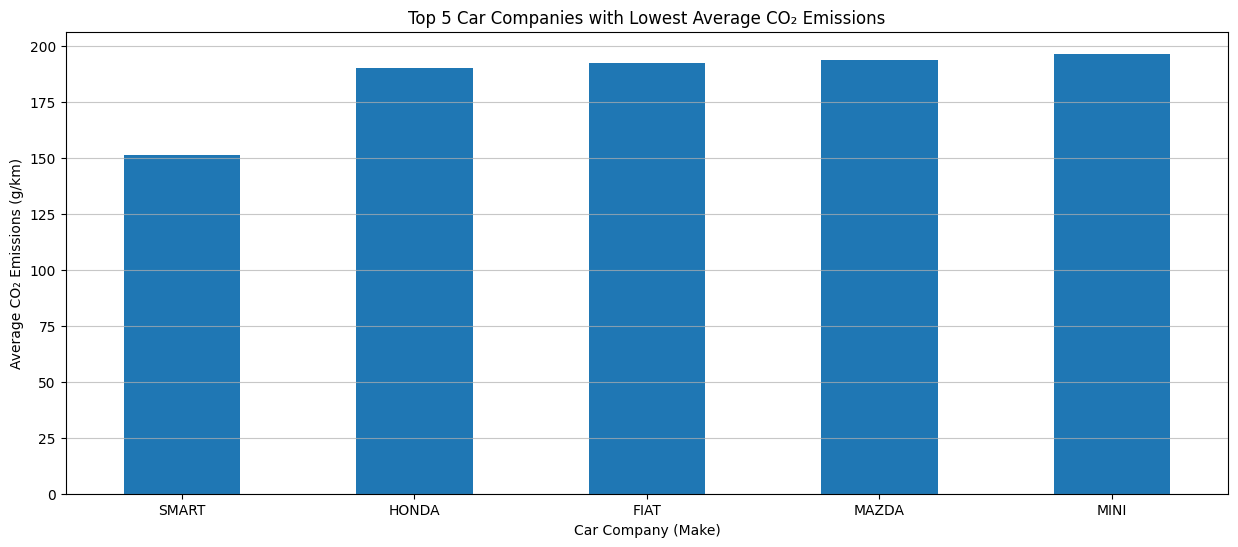

In [ ]:
avg_emissions = df.groupby('Make')['CO2 Emissions(g/km)'].mean().sort_values().head(5)

plt.figure(figsize=(15,6))
avg_emissions.plot(kind='bar')
plt.title('Top 5 Car Companies with Lowest Average CO₂ Emissions')
plt.xlabel('Car Company (Make)')
plt.ylabel('Average CO₂ Emissions (g/km)')
plt.xticks(rotation=0)
plt.grid(axis='y',  alpha=0.7)
plt.show()

/tmp/ipython-input-72-1934462048.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=lowest_per_class.sort_values('CO2 Emissions(g/km)'), x='Label', y='CO2 Emissions(g/km)', palette='crest')


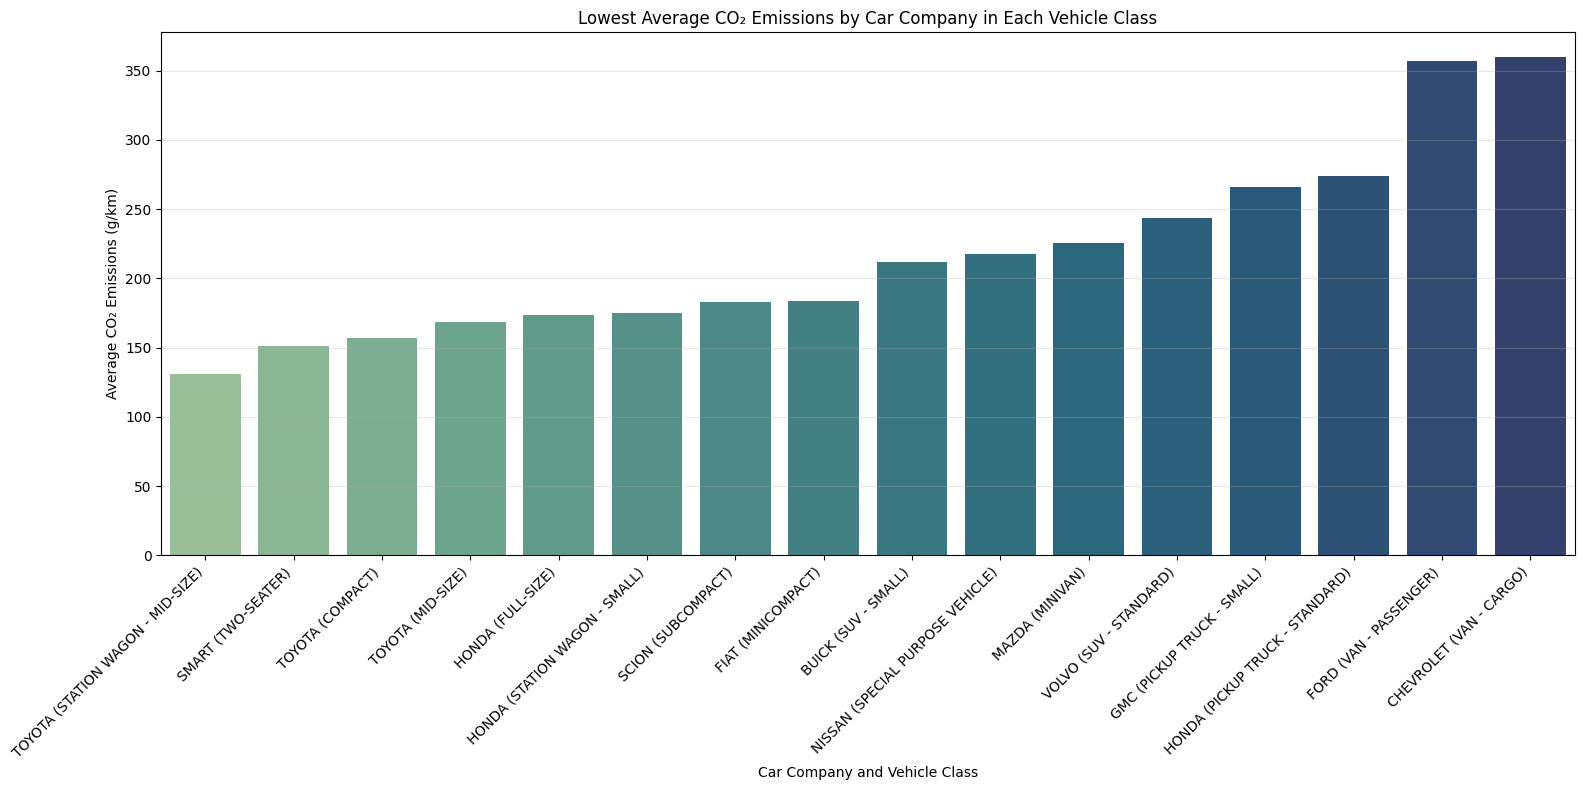

In [ ]:
avg_emissions = df.groupby(['Vehicle Class', 'Make'])['CO2 Emissions(g/km)'].mean().reset_index()

lowest_per_class = avg_emissions.loc[avg_emissions.groupby('Vehicle Class')['CO2 Emissions(g/km)'].idxmin()]

lowest_per_class['Label'] = lowest_per_class['Make'] + ' (' + lowest_per_class['Vehicle Class'] + ')'

plt.figure(figsize=(16, 8))
sns.barplot(data=lowest_per_class.sort_values('CO2 Emissions(g/km)'), x='Label', y='CO2 Emissions(g/km)', palette='crest')
plt.title('Lowest Average CO₂ Emissions by Car Company in Each Vehicle Class')
plt.ylabel('Average CO₂ Emissions (g/km)')
plt.xlabel('Car Company and Vehicle Class')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', alpha=0.3)
plt.show()


In [ ]:
class_counts = df.groupby('Vehicle Class')['Make'].nunique()

valid_classes = class_counts[class_counts >= 2].index

filtered_df = df[df['Vehicle Class'].isin(valid_classes)]

lowest_emitters = (
    filtered_df.groupby(['Vehicle Class', 'Make'])['CO2 Emissions(g/km)']
    .mean()
    .reset_index()
    .sort_values(['Vehicle Class', 'CO2 Emissions(g/km)'])
)

lowest_per_class = lowest_emitters.groupby('Vehicle Class').first().reset_index()

winner_counts = lowest_per_class['Make'].value_counts()

print(winner_counts)


Make
TOYOTA       3
HONDA        3
FIAT         1
MAZDA        1
GMC          1
NISSAN       1
SCION        1
BUICK        1
VOLVO        1
SMART        1
CHEVROLET    1
FORD         1
Name: count, dtype: int64


/tmp/ipython-input-74-2212674881.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=winner_counts.index, y=winner_counts.values, palette="viridis")


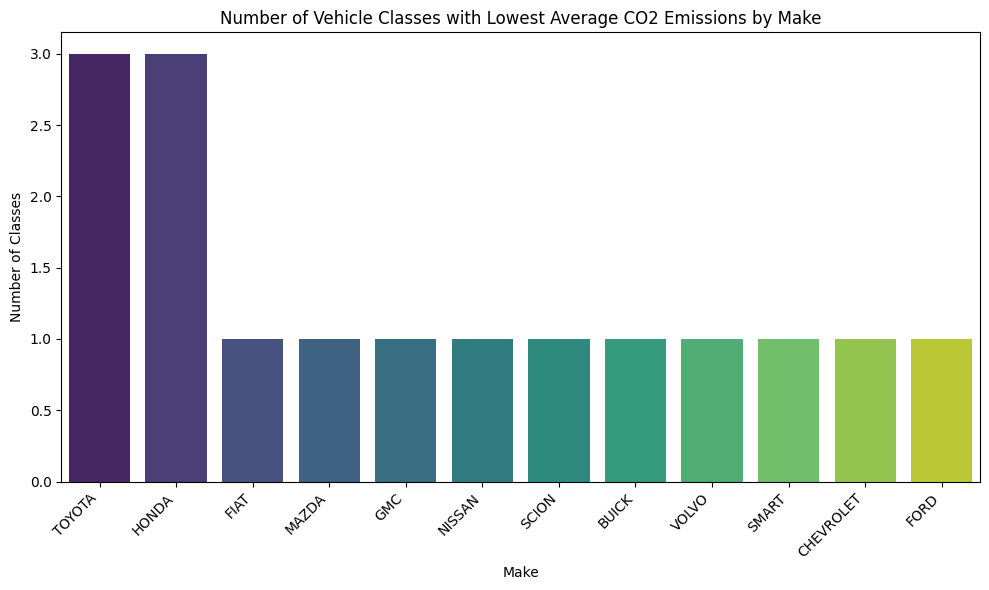

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=winner_counts.index, y=winner_counts.values, palette="viridis")

plt.title('Number of Vehicle Classes with Lowest Average CO2 Emissions by Make')
plt.xlabel('Make')
plt.ylabel('Number of Classes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

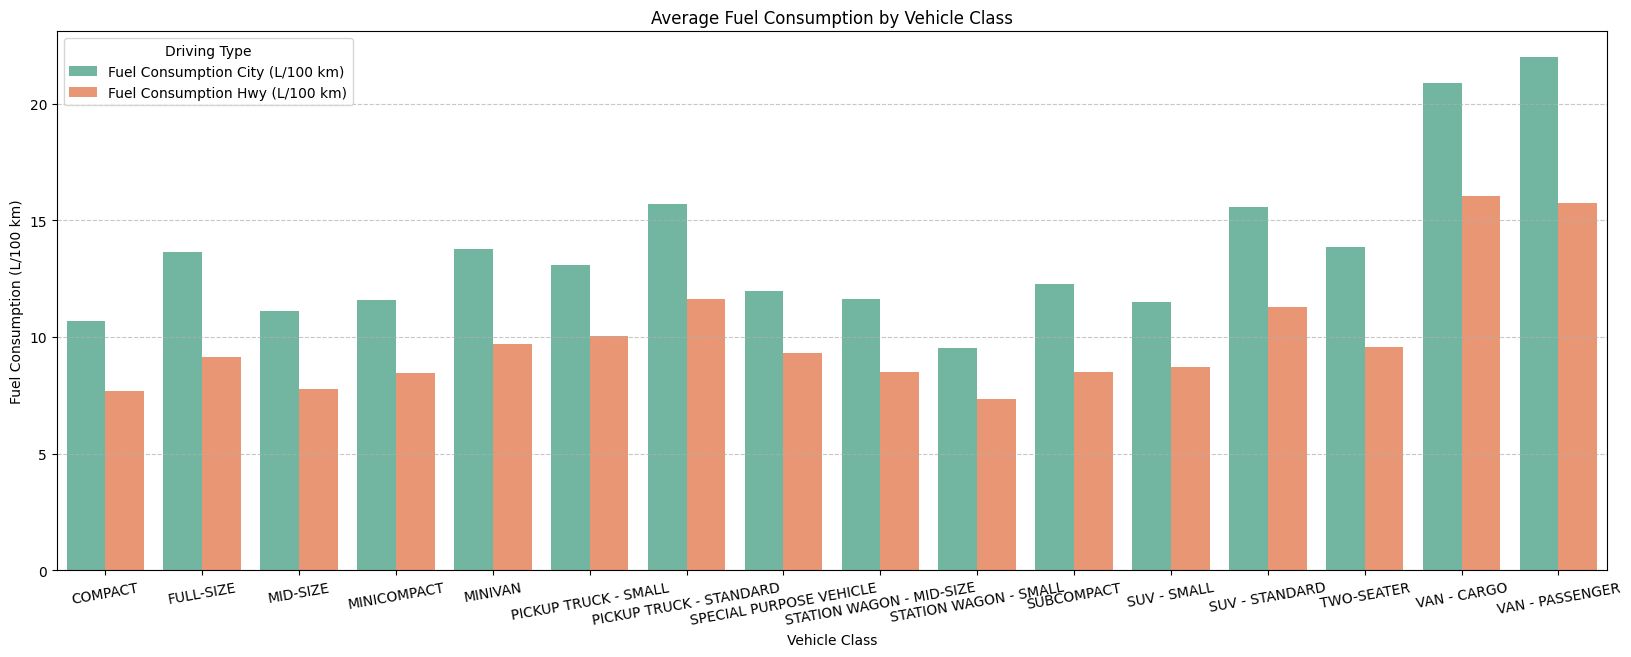

In [ ]:
vehicle_consumption = df.groupby('Vehicle Class')[['Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)']].mean().reset_index()

plt.figure(figsize=(20, 7))
sns.barplot(data=vehicle_consumption.melt(id_vars='Vehicle Class', var_name='Driving Type', value_name='Fuel Consumption'),
            x='Vehicle Class', y='Fuel Consumption', hue='Driving Type', palette='Set2')

plt.title('Average Fuel Consumption by Vehicle Class')
plt.ylabel('Fuel Consumption (L/100 km)')
plt.xticks(rotation=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

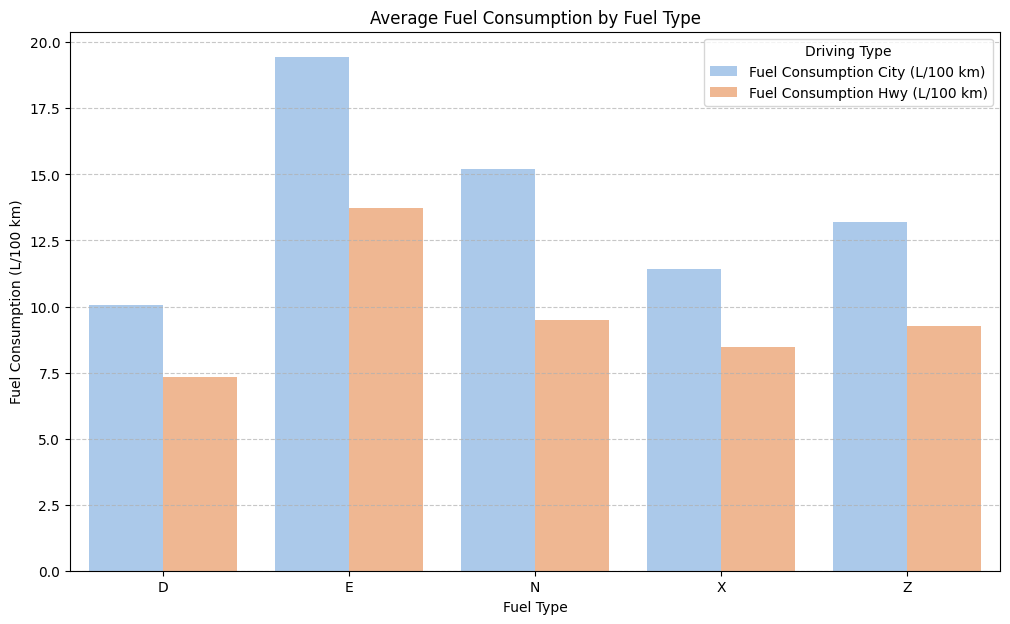

In [ ]:
fuel_type_consumption = df.groupby('Fuel Type')[['Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)']].mean().reset_index()

plt.figure(figsize=(12, 7))
sns.barplot(data=fuel_type_consumption.melt(id_vars='Fuel Type', var_name='Driving Type', value_name='Fuel Consumption'),
            x='Fuel Type', y='Fuel Consumption', hue='Driving Type', palette='pastel')

plt.title('Average Fuel Consumption by Fuel Type')
plt.ylabel('Fuel Consumption (L/100 km)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


/tmp/ipython-input-77-3738253881.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_classes.index, y=top_classes.values, palette='viridis')


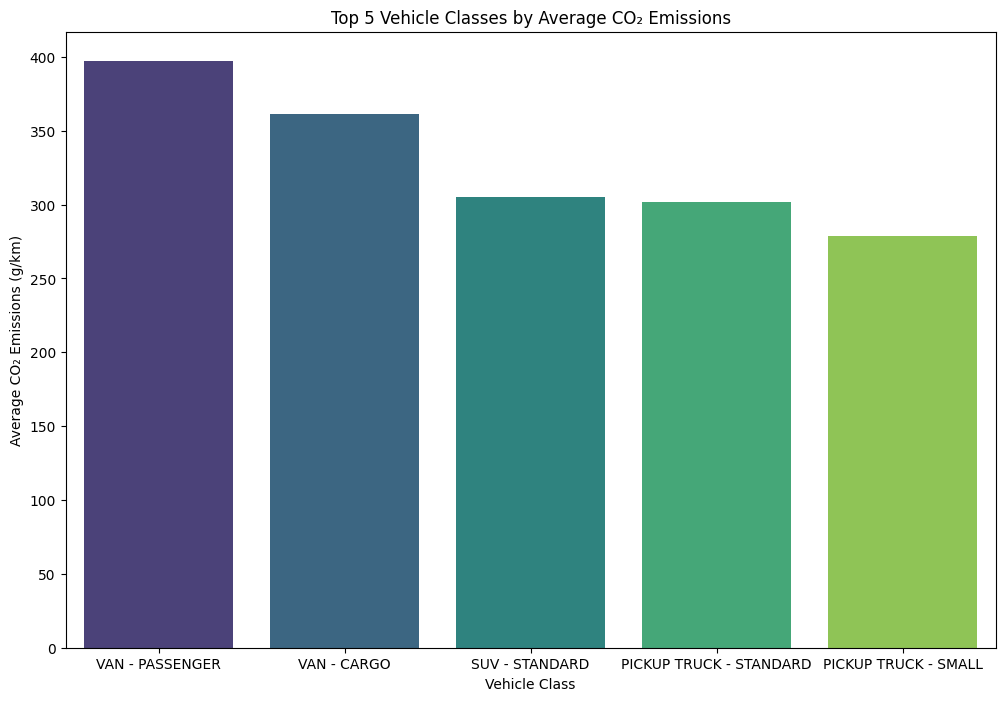

In [ ]:
top_classes = df.groupby('Vehicle Class')['CO2 Emissions(g/km)'].mean().sort_values(ascending=False).head(5)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_classes.index, y=top_classes.values, palette='viridis')
plt.xlabel('Vehicle Class')
plt.ylabel('Average CO₂ Emissions (g/km)')
plt.title('Top 5 Vehicle Classes by Average CO₂ Emissions')
plt.show()

/tmp/ipython-input-78-2281224408.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=engine_co2.index, y=engine_co2.values, palette='magma')


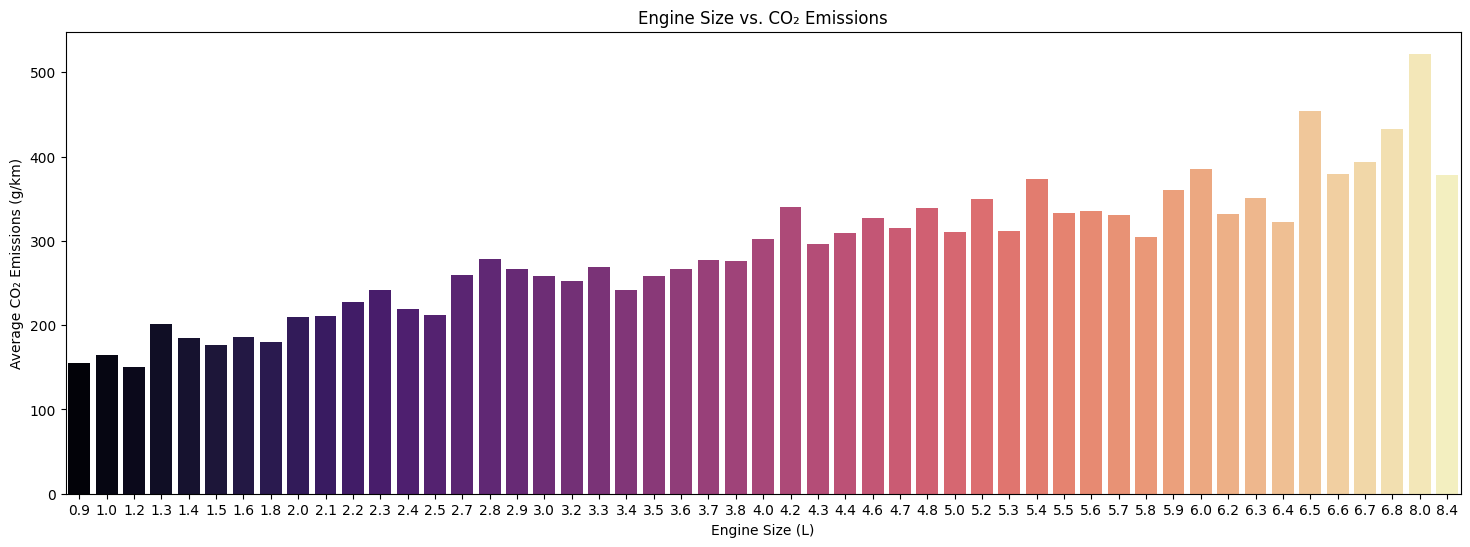

In [ ]:
engine_co2 = df.groupby('Engine Size(L)')['CO2 Emissions(g/km)'].mean().sort_index()

plt.figure(figsize=(18, 6))
sns.barplot(x=engine_co2.index, y=engine_co2.values, palette='magma')
plt.xlabel('Engine Size (L)')
plt.ylabel('Average CO₂ Emissions (g/km)')
plt.title('Engine Size vs. CO₂ Emissions')
plt.xticks(rotation=0)
plt.show()


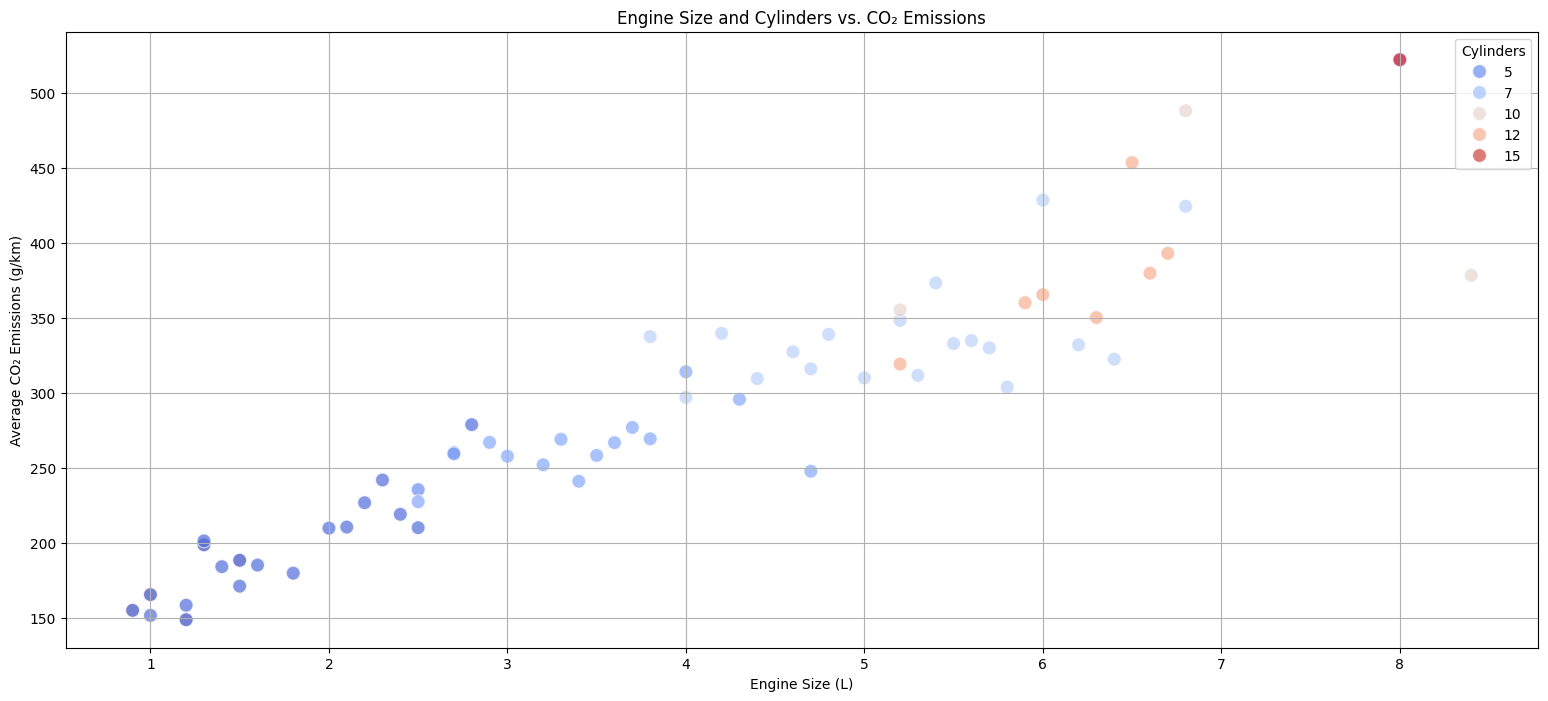

In [ ]:
engine_cylinders_co2 = df.groupby(['Engine Size(L)', 'Cylinders'])['CO2 Emissions(g/km)'].mean().reset_index()

plt.figure(figsize=(19, 8))
sns.scatterplot(
    data=engine_cylinders_co2,
    x='Engine Size(L)',
    y='CO2 Emissions(g/km)',
    hue='Cylinders',
    palette='coolwarm',
    s=100,
    alpha=0.7
)

plt.xlabel('Engine Size (L)')
plt.ylabel('Average CO₂ Emissions (g/km)')
plt.title('Engine Size and Cylinders vs. CO₂ Emissions')
plt.legend(title='Cylinders')
plt.grid(True)
plt.show()


In [ ]:
def find_outlier_in_column(column_name):
  Q1 = df[column_name].quantile(0.25)
  Q3 = df[column_name].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

  return outliers

In [ ]:
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        print(f"\nOutliers for column: {col}")
        outliers = find_outlier_in_column(col)
        outlier_percentage = (len(outliers) / len(df[col])) * 100
        print(f"Percentage of Outliers: {outlier_percentage:.2f}%")



Outliers for column: Engine Size(L)
Percentage of Outliers: 1.86%

Outliers for column: Cylinders
Percentage of Outliers: 2.65%

Outliers for column: Fuel Consumption City (L/100 km)
Percentage of Outliers: 1.79%

Outliers for column: Fuel Consumption Hwy (L/100 km)
Percentage of Outliers: 2.82%

Outliers for column: Fuel Consumption Comb (L/100 km)
Percentage of Outliers: 1.92%

Outliers for column: Fuel Consumption Comb (mpg)
Percentage of Outliers: 1.54%

Outliers for column: CO2 Emissions(g/km)
Percentage of Outliers: 1.08%


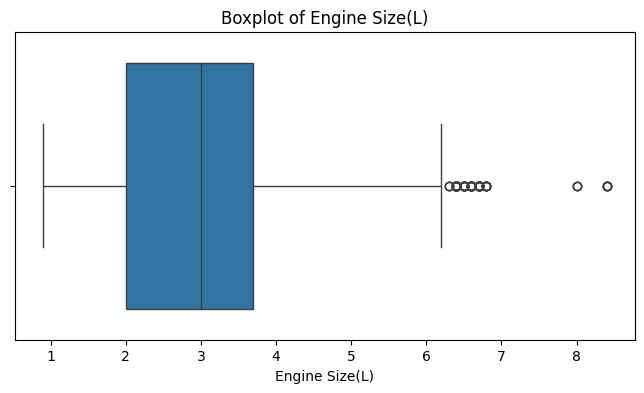

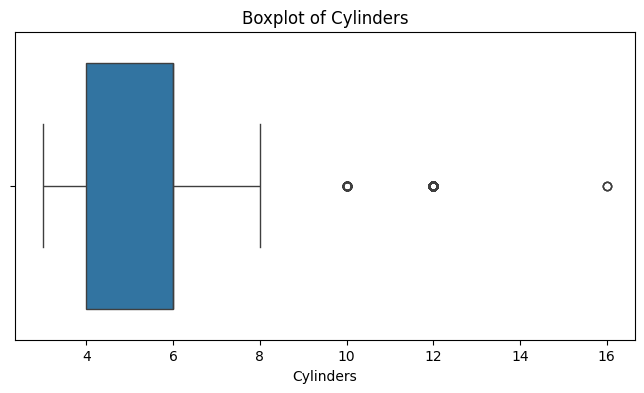

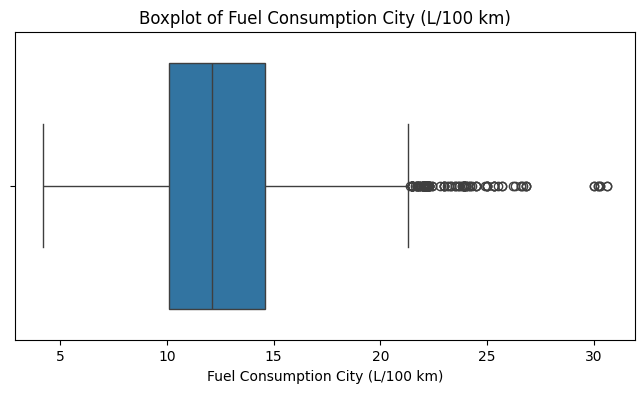

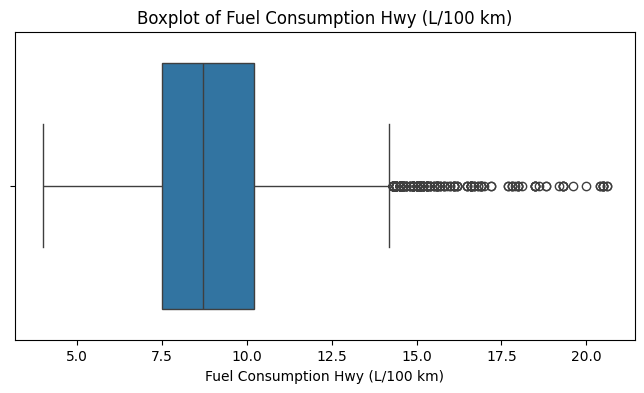

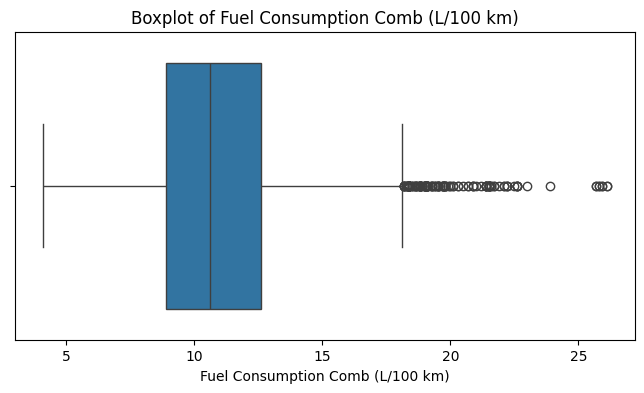

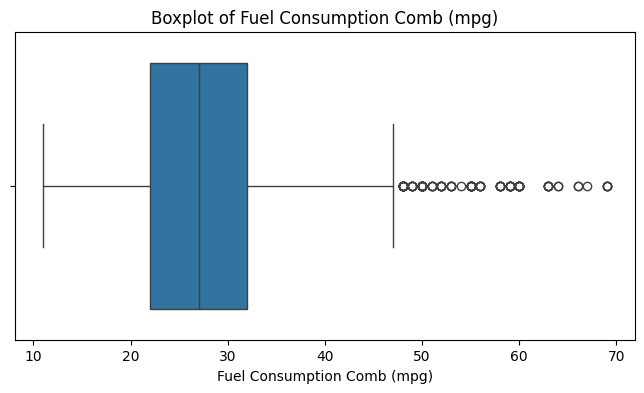

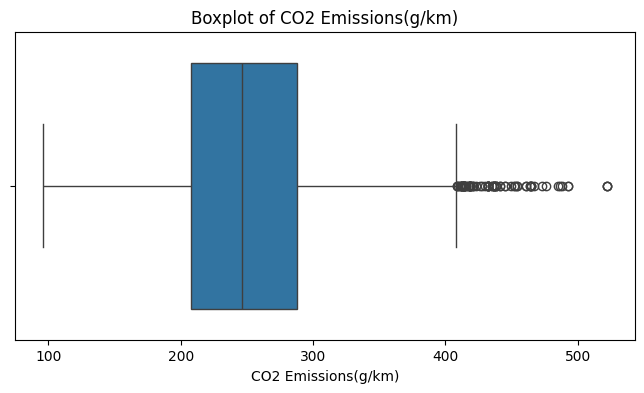

In [ ]:
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[col])
        plt.title(f"Boxplot of {col}")
        plt.show()


In [ ]:
def skew_check(df):
  skewness = df.skew(numeric_only=True)

  for col, value in skewness.items():
      print(f"Skewness of {col}: {value:.2f}", end='')

      if (value > 1 or value < -1):
          print(" --> Highly Skewed")
      elif (value > 0.5 or value < -0.5):
          print(" --> Moderately Skewed")
      else:
          print(" --> Approximately Symmetric")

In [ ]:
skew_check(df)

Skewness of Engine Size(L): 0.81 --> Moderately Skewed
Skewness of Cylinders: 1.11 --> Highly Skewed
Skewness of Fuel Consumption City (L/100 km): 0.81 --> Moderately Skewed
Skewness of Fuel Consumption Hwy (L/100 km): 1.08 --> Highly Skewed
Skewness of Fuel Consumption Comb (L/100 km): 0.89 --> Moderately Skewed
Skewness of Fuel Consumption Comb (mpg): 0.98 --> Moderately Skewed
Skewness of CO2 Emissions(g/km): 0.53 --> Moderately Skewed


In [ ]:
print("Correlation of Each Column with CO2 Emissions:\n")

correlation = df.corr(numeric_only=True)['CO2 Emissions(g/km)'].sort_values(ascending=False)
high_corr_features = correlation[(correlation.abs() > 0.5) & (correlation.index != 'CO2 Emissions(g/km)')].index.tolist()

for feature in correlation.index:
    corr_value = correlation[feature]
    print(f"{feature:<35} | Correlation: {corr_value:.3f}", end='')

    if feature in high_corr_features and feature != 'CO2 Emissions(g/km)':
        print("  --> Strong Correlation")
    else:
        print()


Correlation of Each Column with CO2 Emissions:

CO2 Emissions(g/km)                 | Correlation: 1.000
Fuel Consumption City (L/100 km)    | Correlation: 0.920  --> Strong Correlation
Fuel Consumption Comb (L/100 km)    | Correlation: 0.918  --> Strong Correlation
Fuel Consumption Hwy (L/100 km)     | Correlation: 0.884  --> Strong Correlation
Engine Size(L)                      | Correlation: 0.851  --> Strong Correlation
Cylinders                           | Correlation: 0.833  --> Strong Correlation
Fuel Consumption Comb (mpg)         | Correlation: -0.907  --> Strong Correlation


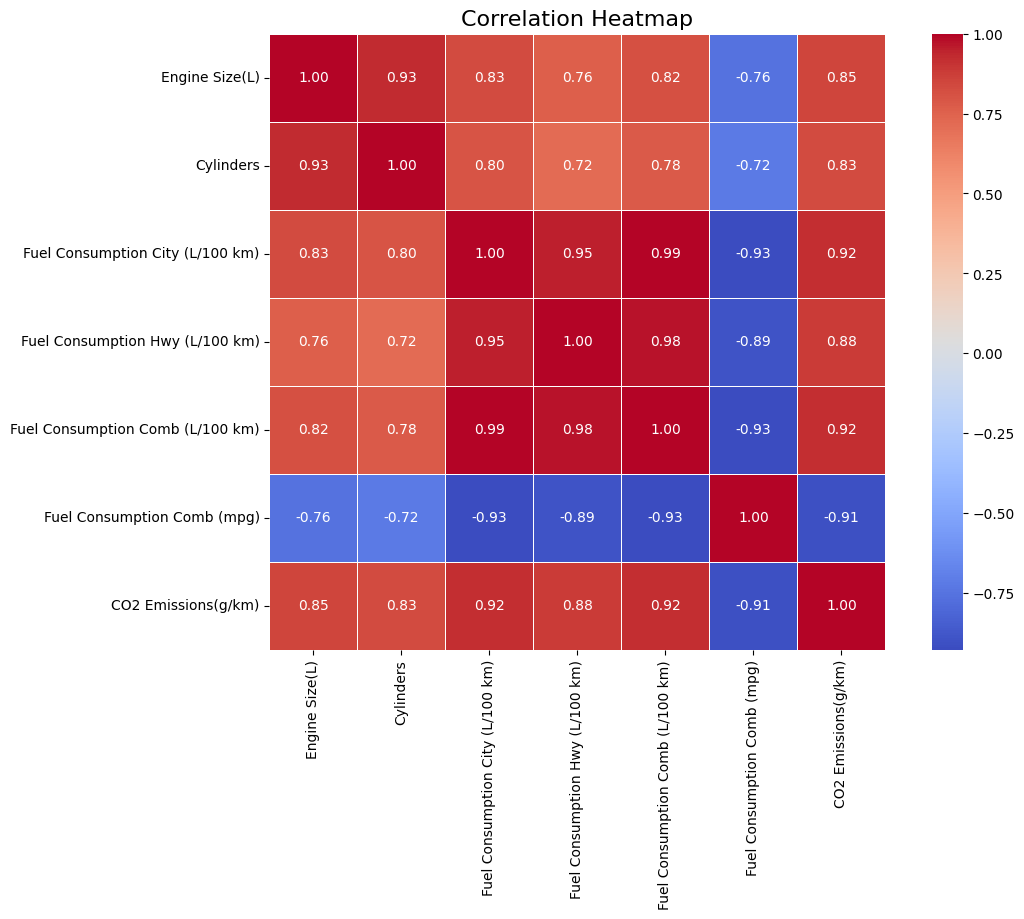

In [ ]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)

plt.title('Correlation Heatmap', fontsize=16)
plt.show()


In [ ]:
for col in df.columns:
  if pd.api.types.is_object_dtype(df[col]):
    print(f"\nUnique Values in {col}:")
    print(len(df[col].unique()))



Unique Values in Make:
42

Unique Values in Model:
2053

Unique Values in Vehicle Class:
16

Unique Values in Transmission:
27

Unique Values in Fuel Type:
5


In [ ]:
X = df.drop(columns=['CO2 Emissions(g/km)','Make','Model','Fuel Consumption Comb (mpg)'])
y = df['CO2 Emissions(g/km)']

In [ ]:
fuel_counts = X['Fuel Type'].value_counts()
X = X[X['Fuel Type'].isin(fuel_counts[fuel_counts > 1].index)]
y = y[X.index]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=X['Fuel Type'], random_state=42
)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=X['Fuel Type'],  random_state=42)

In [ ]:
class CustomEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.binary_encoder = ce.BinaryEncoder(cols=['Vehicle Class', 'Transmission'])
        self.onehot_encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

    def fit(self, X, y=None):
        X_temp = self.binary_encoder.fit_transform(X)
        self.onehot_encoder.fit(X_temp[['Fuel Type']])
        return self

    def transform(self, X):
        X_temp = self.binary_encoder.transform(X)
        fuel_encoded = pd.DataFrame(
            self.onehot_encoder.transform(X_temp[['Fuel Type']]),
            columns=self.onehot_encoder.get_feature_names_out(['Fuel Type']),
            index=X_temp.index
        )
        X_temp = X_temp.drop(columns=['Fuel Type']).reset_index(drop=True)
        fuel_encoded = fuel_encoded.reset_index(drop=True)
        return pd.concat([X_temp, fuel_encoded], axis=1)


In [ ]:
encoder = CustomEncoder()
encoder.fit(X_train, y_train)

X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)


In [ ]:
X_train.head()

,Vehicle Class_0,Vehicle Class_1,Vehicle Class_2,Vehicle Class_3,Vehicle Class_4,Engine Size(L),Cylinders,Transmission_0,Transmission_1,Transmission_2,Transmission_3,Transmission_4,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Type_E,Fuel Type_X,Fuel Type_Z
0,0,0,0,0,1,2.0,4,0,0,0,0,1,10.2,7.2,8.8,0.0,0.0,1.0
1,0,0,0,1,0,5.3,8,0,0,0,1,0,14.9,10.9,13.1,0.0,1.0,0.0
2,0,0,0,1,1,3.5,6,0,0,0,1,1,12.5,9.1,10.9,0.0,0.0,1.0
3,0,0,1,0,0,2.5,4,0,0,1,0,0,9.2,6.6,8.1,0.0,1.0,0.0
4,0,0,1,0,1,5.3,8,0,0,1,0,1,18.3,14.2,16.5,0.0,1.0,0.0


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor


In [ ]:
models_scaled = [
    ("Linear Regression", LinearRegression()),
    ("Ridge Regression", Ridge()),
    ("Lasso Regression", Lasso()),
    ("Support Vector Regressor", SVR()),
    ("KNN Regressor", KNeighborsRegressor())
]

models_unscaled = [
    ("Random Forest", RandomForestRegressor()),
    ("XGBoost", XGBRegressor(objective='reg:squarederror')),
    ("Decision Tree", DecisionTreeRegressor())
]


In [ ]:
def evaluate_models(model_list, Xtr, Xte):
    for name, model in model_list:
        model.fit(Xtr, y_train)
        preds = model.predict(Xte)
        r2 = r2_score(y_test, preds)
        rmse = np.sqrt(mean_squared_error(y_test, preds))
        print(f"{name} — R²: {r2:.4f}, RMSE: {rmse:.4f}")

In [ ]:
evaluate_models(models_scaled, X_train_scaled, X_test_scaled)

evaluate_models(models_unscaled, X_train, X_test)


Linear Regression — R²: 0.9910, RMSE: 5.5365
Ridge Regression — R²: 0.9910, RMSE: 5.5323
Lasso Regression — R²: 0.9847, RMSE: 7.2025


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.549e+03, tolerance: 2.025e+03
  model = cd_fast.enet_coordinate_descent(


Support Vector Regressor — R²: 0.9067, RMSE: 17.8176
KNN Regressor — R²: 0.9769, RMSE: 8.8678
Random Forest — R²: 0.9975, RMSE: 2.9392
XGBoost — R²: 0.9980, RMSE: 2.5852
Decision Tree — R²: 0.9964, RMSE: 3.4925


In [ ]:
model = XGBRegressor(objective='reg:squarederror')
model.fit(X_train, y_train)

r2_train = model.score(X_train, y_train)
r2_test = model.score(X_test, y_test)

print(f"Train R²: {r2_train:.4f}, Test R²: {r2_test:.4f}")


Train R²: 0.9992, Test R²: 0.9980


In [ ]:
def plot_feature_importance(model, feature_names, top_n=20, title='Top Feature Importances'):
    importances = model.feature_importances_

    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(12, 6))
    sns.barplot(x='Importance', y='Feature', data=importance_df.head(top_n), palette='viridis')
    plt.title(title)
    plt.tight_layout()
    plt.show()


/tmp/ipython-input-100-1890392296.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df.head(top_n), palette='viridis')


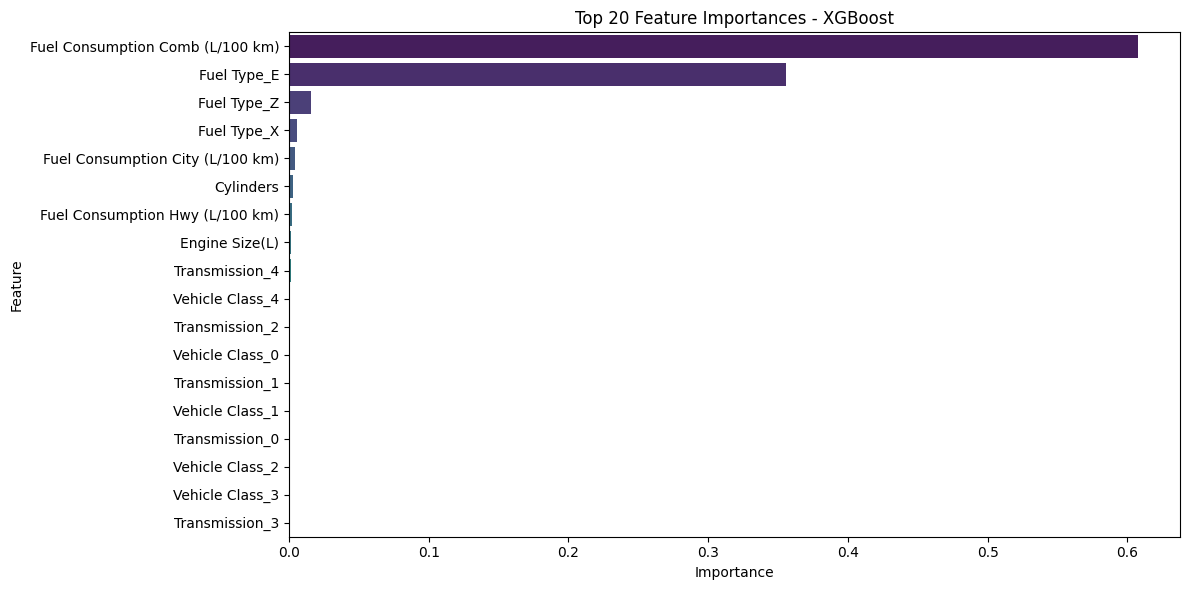

In [ ]:
plot_feature_importance(model, X_train.columns, top_n=20, title='Top 20 Feature Importances - XGBoost')

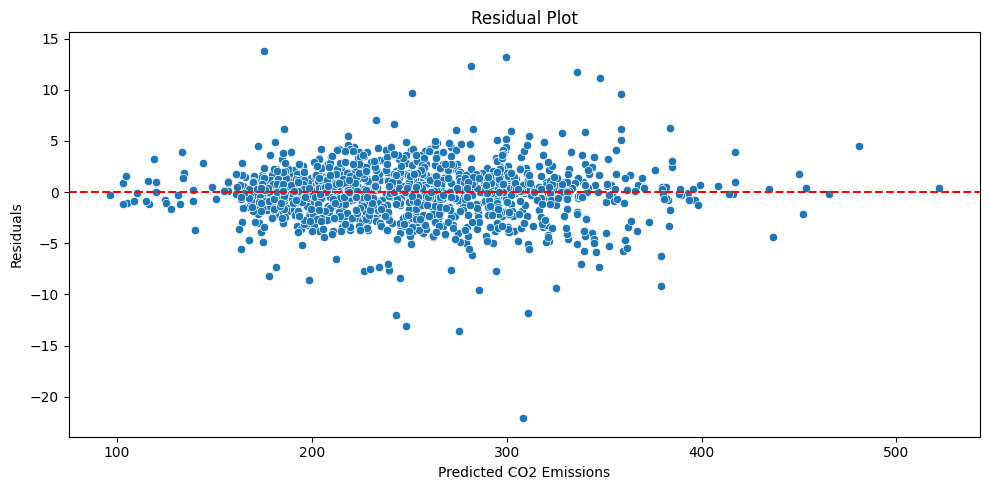

In [ ]:
y_pred = model.predict(X_test)

residuals = y_test - y_pred

plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted CO2 Emissions')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean R²: {np.mean(cv_scores):.4f}, Std Dev: {np.std(cv_scores):.4f}")


Cross-Validation R² Scores: [0.99780238 0.9962039  0.99808401 0.99740613 0.99751562]
Mean R²: 0.9974, Std Dev: 0.0006


In [ ]:
X = X.drop(columns=['Fuel Consumption Comb (L/100 km)','Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=X['Fuel Type'], random_state=42
)

X_train_raw = X_train.copy()
y_train_raw = y_train.copy()
X_test_raw = X_test.copy()
y_test_raw = y_test.copy()

encoder = CustomEncoder()
encoder.fit(X_train, y_train)

X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
log_transformer = FunctionTransformer(np.log1p, validate=True)

preprocessor = ColumnTransformer(
    transformers=[
        ('log', log_transformer, ['Cylinders'])
    ],
    remainder='passthrough'
)

In [ ]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([

    ('custom_encoder', CustomEncoder()),
    ('log_transform', preprocessor),
    ('scaler', StandardScaler()),
    ('model', XGBRegressor(objective='reg:squarederror'))
])


In [ ]:
pipeline.fit(X_train_raw, y_train_raw)

import joblib
joblib.dump(pipeline, 'final_pipeline.pkl')


['final_pipeline.pkl']

In [ ]:
r2 = pipeline.score(X_test_raw, y_test_raw)
print(f"Test R²: {r2:.4f}")


Test R²: 0.9325


In [ ]:
from google.colab import files
files.download('final_pipeline.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
evaluate_models(models_scaled, X_train_scaled, X_test_scaled)

evaluate_models(models_unscaled, X_train, X_test)

Linear Regression — R²: 0.7837, RMSE: 27.1235
Ridge Regression — R²: 0.7837, RMSE: 27.1231
Lasso Regression — R²: 0.7801, RMSE: 27.3476
Support Vector Regressor — R²: 0.7522, RMSE: 29.0287
KNN Regressor — R²: 0.9026, RMSE: 18.1968
Random Forest — R²: 0.9330, RMSE: 15.0952
XGBoost — R²: 0.9325, RMSE: 15.1538
Decision Tree — R²: 0.9285, RMSE: 15.5972


In [ ]:
model = XGBRegressor(objective='reg:squarederror')
model.fit(X_train, y_train)

r2_train = model.score(X_train, y_train)
r2_test = model.score(X_test, y_test)

print(f"Train R²: {r2_train:.4f}, Test R²: {r2_test:.4f}")


Train R²: 0.9483, Test R²: 0.9325


/tmp/ipython-input-100-1890392296.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df.head(top_n), palette='viridis')


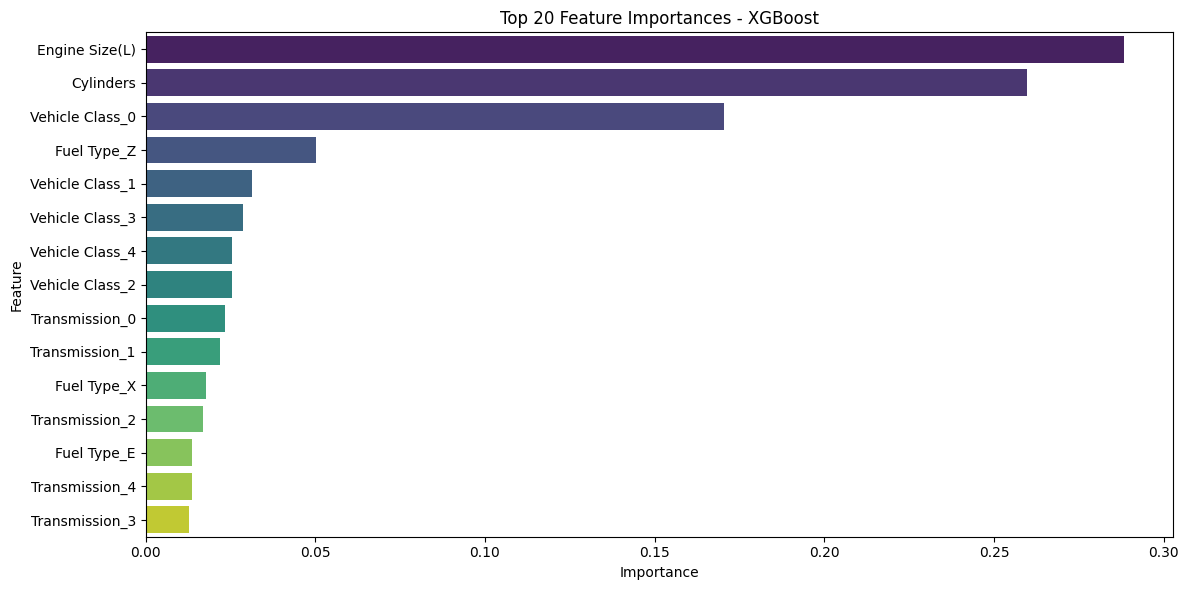

In [ ]:
plot_feature_importance(model, X_train.columns, top_n=20, title='Top 20 Feature Importances - XGBoost')
